# Classification model for EBOV VP40

### Functions emplopyed in the project

In [1]:
def graphing(a):
    # Creating dataset
    label = ['Actives', 'Inactives']
    
    data = a
    # Creating explode data
    explode = (0.2, 0.0)
    
    # Creating color parameters
    colors = ( "blue","orange")
    
    # Wedge properties
    wp = { 'linewidth' : 1, 'edgecolor' : "green" }
    
    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d})".format(pct, absolute)
    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 6))
    wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = label,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
    # Adding legend
    ax.legend(wedges, label,
          title ="Datasets",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1))
    
    plt.setp(autotexts, size = 10, weight ="bold")
    ax.set_title("Pie Chart of Data Distibution")
    # show plot
    plt.show()
    


In [2]:
def mannwhitney(descriptor, verbose=False):
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu
    
    #seed the random number generator
    seed(1)
    
    #actives and inactives
    selection = [descriptor, 'Label']
    df = Data[selection]
    active = df[df.Label==1]
    active = active[descriptor]
    
    selection = [descriptor, 'Label']
    df = Data[selection]
    inactive = df[df.Label==0]
    inactive = inactive[descriptor]
    
    #compare samples
    stat, p =mannwhitneyu(active, inactive)
    #print('Stastistics=%.3f, p=%.3f' % (stat,p))
    
    #Interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution'
    else:
        interpretation = 'Different distribution'
    results =pd.DataFrame({'Descriptor':descriptor,
                           'Statistics':stat,
                           'p':p,
                           'alpha':alpha,
                           'Interpretation':interpretation}, index=[0])
    
    #filename = 'mannwhitneyu_results.csv'
    #filename = 'mannwhitneyu_' + descriptor + '.csv'
    #results.to_csv(filename)
    
    return results

### Importing Datasets and libraries 

In [3]:
import os
import time
import pickle
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter.filedialog import asksaveasfilename as sa

from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [4]:
import sklearn
import imblearn
im = imblearn.__version__
sk = sklearn.__version__
pp = pd.__version__
nn = np.__version__
print('sklearn ',sk)
print('imblearn',im)
print('pandas',pp)
print('numpy',nn)

sklearn  0.24.2
imblearn 0.8.1
pandas 1.1.5
numpy 1.19.2


In [5]:
#Importing actives and inactive files followed by labelling the datasets
act = pd.read_csv('actives.csv')
inact = pd.read_csv('inactives.csv')
m=np.ones((act.shape[0],1))
n=np.zeros((inact.shape[0],1))
q = np.concatenate((m,n),axis=0)

C:\Users\joe1a\anaconda3\envs\Joe\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1145) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#Merging active and inactive datasets and adding string labels
Data = pd.concat([act,inact],axis=0)
Data = Data.drop(['Name'],axis=1)
lc = [];
for i in q:
    if i ==1:
        lc.append('Active')
    else:
        lc.append('Inactive')
Data['Label']=lc
Data

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,Label
0,0,-1.5652,2.449851,28.1800,46.230688,18,21,39,23,16,...,47.593070,2.069264,21.060562,2.544035,18.516527,1108.0,39.0,1.354,130.0,Active
1,0,1.3415,1.799622,73.4343,56.709411,6,6,51,24,27,...,47.569611,1.982067,10.990267,8.016265,2.974002,1346.0,40.0,5.874,120.0,Active
2,0,-2.0012,4.004801,48.5254,49.798239,9,10,45,22,23,...,44.185231,2.008420,17.434467,2.798494,14.635974,1306.0,28.0,3.939,104.0,Active
3,0,0.0092,0.000085,45.0577,50.929067,12,12,42,23,19,...,48.038579,2.088634,15.681640,0.000000,13.131199,1082.0,41.0,4.323,126.0,Active
4,0,-3.1232,9.754378,128.9089,88.960927,6,6,81,42,39,...,83.725615,1.993467,34.948217,20.472254,14.475964,5641.0,88.0,0.603,234.0,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,0,-0.5121,0.262246,9.8804,19.258344,6,6,17,9,8,...,17.548927,1.949881,5.273677,5.273677,0.000000,86.0,10.0,1.389,40.0,Inactive
1373,0,-1.2102,1.464584,6.7867,17.129551,6,6,15,8,7,...,15.532829,1.941604,4.990326,2.495163,2.495163,62.0,7.0,0.803,36.0,Inactive
1374,0,0.3378,0.114109,11.6864,21.444758,6,6,17,11,6,...,22.509724,2.046339,5.588995,5.588995,0.000000,144.0,14.0,3.230,56.0,Inactive
1375,1,-0.9897,0.979506,11.4414,19.691551,6,6,17,10,7,...,19.384819,1.938482,7.332074,4.814127,2.517947,114.0,12.0,1.643,46.0,Inactive


### Splitting Data before preprocessing

In [7]:
num1 = np.array(Data)
np.random.seed(42)
np.take(num1,np.random.permutation(num1.shape[0]),axis=0,out=num1)
g=num1.shape[0]
r=int(0.75*g)
test=num1[r:g,:]
train=num1[0:r,:]
colo = Data.columns
Datum = pd.DataFrame(test,columns=colo)
Datt = pd.DataFrame(train,columns=colo)


In [8]:
Datum

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,Label
0,0,-0.6469,0.41848,52.9108,51.1114,9,10,44,22,22,...,46.8781,2.13082,9.79356,2.60861,7.18495,837,48,3.601,134,Active
1,1,-4.5849,21.0213,70.6843,45.4134,0,0,46,24,22,...,46.2741,1.92809,30.8425,30.8425,0,1297,41,-4.847,116,Inactive
2,1,-0.9949,0.989826,33.6078,39.7447,11,11,32,21,11,...,41.5182,1.97706,23.9206,12.6274,5.47754,939,30,0.884,108,Inactive
3,0,2.4663,6.08264,39.9171,40.1114,6,6,37,15,22,...,28.7467,1.91645,2.51366,2.51366,0,366,19,6.302,76,Active
4,0,1.1838,1.40138,11.3481,26.2143,10,11,20,12,8,...,24.3605,2.03005,5.58948,0,3.05196,185,16,3.41,62,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,0,0.8521,0.726074,23.6306,45.4681,17,17,39,25,14,...,50.3345,2.01338,25.5605,2.58406,15.3788,1359,41,2.193,132,Inactive
492,0,-1.6657,2.77456,49.4379,57.413,12,12,51,27,24,...,54.0391,2.00145,19.8653,13.9589,5.90639,2688,32,2.796,126,Inactive
493,0,2.3381,5.46671,76.1249,40.3363,0,0,27,19,8,...,39.2269,2.06458,18.2162,3.0391,0,520,46,3.005,134,Inactive
494,0,-0.4965,0.246512,38.0615,27.8491,0,0,28,9,19,...,16.4983,1.83314,2.375,0,2.375,108,6,2.89,34,Inactive


In [9]:
Datt

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,Label
0,0,1.0674,1.13934,12.2044,10.86,0,0,3,3,0,...,4.91421,1.63807,6.82843,0,0,4,0,1.161,6,Active
1,1,-3.8977,15.1921,55.518,51.1014,0,0,50,18,32,...,34.6616,1.92564,4.76416,4.76416,0,954,15,7.57,68,Inactive
2,2,-1.5283,2.3357,33.7061,48.0339,12,12,41,26,15,...,51.7072,1.98874,23.87,14.6861,9.18388,2087,36,3.502,126,Inactive
3,0,-0.7281,0.53013,30.5813,28.9183,0,0,23,15,8,...,30.2218,2.01478,14.0253,5.1369,6.44957,342,24,1.349,76,Inactive
4,2,-3.2088,10.2964,79.604,63.9203,11,11,54,36,18,...,72.5491,2.01525,45.2677,23.3845,18.7953,4114,62,-1.693,194,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,0,0.568,0.322624,50.0644,62.1239,17,18,50,30,20,...,61.3928,2.04643,19.7905,10.6836,6.08749,2999,43,5.373,158,Inactive
1483,0,-1.1703,1.3696,7.5221,17.634,9,10,15,10,5,...,20.4104,2.04104,14.6963,0,14.6963,105,12,-0.664,52,Inactive
1484,0,-3.1232,9.75438,128.909,88.9609,6,6,81,42,39,...,83.7256,1.99347,34.9482,20.4723,14.476,5641,88,0.603,234,Active
1485,0,1.1976,1.43425,28.9627,30.9345,6,6,28,16,12,...,30.8507,1.92817,12.625,2.47959,3.00574,457,21,3.702,78,Inactive


### Dealing with imbalanced data

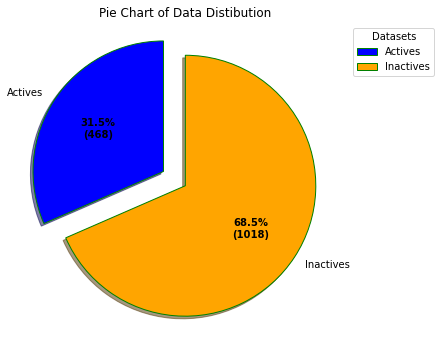

In [10]:
aaa=0
iii=0
for i in Datt.Label:
    if i =='Active':
        aaa+=1
    else:
        iii+=1
Data = Datt
y=Data.Label
# Show pie plot 
y_p = [aaa,iii]
graphing(y_p)

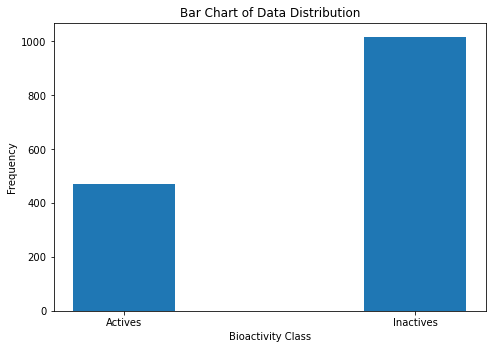

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Actives', 'Inactives']
students = [aaa,iii]
ax.bar(langs,students, width = 0.35)
plt.xlabel('Bioactivity Class')
plt.ylabel('Frequency')
plt.title('Bar Chart of Data Distribution')
plt.show()
plt.savefig('Data.png')

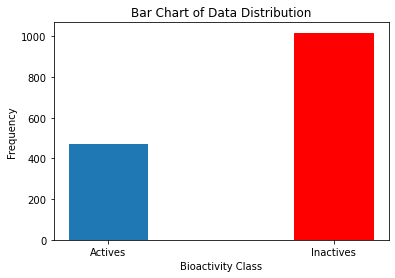

In [12]:
barlist=plt.bar(langs,students, width = 0.35)
barlist[1].set_color('r')
plt.xlabel('Bioactivity Class')
plt.ylabel('Frequency')
plt.title('Bar Chart of Data Distribution')
plt.show()

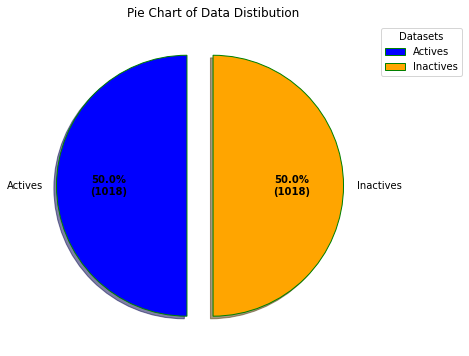

In [13]:
#Random OverSampling
#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(Data, y)

xx=np.array(y_res)
ab=[]
inab=[]
for i in xx:
    if i == 'Active':
        ab.append(1)
    else:
        inab.append(0)                
y_p = [len(ab),len(inab)]
graphing(y_p)

### Feature elimination and standardization

In [14]:
#Loading sets of features that works best with padel
nc = pd.read_csv('Descriptor_list.csv')
Data = X_res
Data = Data[nc.columns]
Data

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,MW,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0,1.0674,1.13934,12.2044,10.86,0,0,3,3,0,...,264.902,88.3008,4.91421,6.82843,0,0,4,0,1.161,6
1,1,-3.8977,15.1921,55.518,51.1014,0,0,50,18,32,...,256.24,5.1248,34.6616,4.76416,4.76416,0,954,15,7.57,68
2,2,-1.5283,2.3357,33.7061,48.0339,12,12,41,26,15,...,357.096,8.70966,51.7072,23.87,14.6861,9.18388,2087,36,3.502,126
3,0,-0.7281,0.53013,30.5813,28.9183,0,0,23,15,8,...,223.027,9.69684,30.2218,14.0253,5.1369,6.44957,342,24,1.349,76
4,2,-3.2088,10.2964,79.604,63.9203,11,11,54,36,18,...,518.086,9.59418,72.5491,45.2677,23.3845,18.7953,4114,62,-1.693,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,0,-0.7836,0.614029,49.7416,46.207,6,6,43,19,24,...,264.184,6.14381,37.2563,11.5253,5.5186,6.0067,892,22,2.917,84
2032,0,-0.5398,0.291384,13.5685,35.0475,12,12,29,17,12,...,228.079,7.86478,34.2636,8.09367,8.09367,0,592,21,4.299,82
2033,0,-0.2084,0.0434306,29.431,49.1511,15,16,40,21,19,...,297.119,7.42797,43.2017,8.93497,3.17171,2.73269,931,29,5.835,106
2034,0,-5.413,29.3006,51.3733,63.3981,6,6,60,22,38,...,304.3,5.07167,43.7085,3.39845,0,3.39845,1667,21,9.705,90


In [15]:
#Applying mannwhitney function to the datasets
#Converting string label to numbers
l=[]
for i in y_res:
    if i == 'Active':
        l.append(1)
    else:
        l.append(0)

Data['Label']=l
Data = Data.fillna(0)
mannwhitney_result=mannwhitney('nAcid')
for i in Data.columns:
    results=mannwhitney(i)
    mannwhitney_result= pd.concat([mannwhitney_result,results],axis=0)

NC=[]
DC=[]
dq=np.array(mannwhitney_result.Interpretation)
df=np.array(mannwhitney_result.Descriptor)

for i in range(len(dq)):
    if dq[i] == 'Different distribution':
        NC.append(df[i])
    else:
        DC.append(df[i])
        
Data=Data[NC]
Data = Data.iloc[:,1:]
Data

C:\Users\joe1a\anaconda3\envs\Joe\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,nAcid,ALogP,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,Label
0,0,1.0674,12.2044,10.860000,0,0,3,3,0,0,...,88.300832,4.914214,6.828427,0.000000,0.000000,4.0,0.0,1.161,6.0,1
1,1,-3.8977,55.5180,51.101376,0,0,50,18,32,16,...,5.124805,34.661557,4.764159,4.764159,0.000000,954.0,15.0,7.570,68.0,0
2,2,-1.5283,33.7061,48.033895,12,12,41,26,15,17,...,8.709661,51.707169,23.869999,14.686119,9.183879,2087.0,36.0,3.502,126.0,0
3,0,-0.7281,30.5813,28.918344,0,0,23,15,8,10,...,9.696845,30.221759,14.025324,5.136896,6.449573,342.0,24.0,1.349,76.0,0
4,2,-3.2088,79.6040,63.920274,11,11,54,36,18,20,...,9.594178,72.549091,45.267748,23.384465,18.795260,4114.0,62.0,-1.693,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,0,-0.7836,49.7416,46.207032,6,6,43,19,24,15,...,6.143809,37.256338,11.525309,5.518604,6.006705,892.0,22.0,2.917,84.0,1
2032,0,-0.5398,13.5685,35.047516,12,12,29,17,12,14,...,7.864781,34.263558,8.093665,8.093665,0.000000,592.0,21.0,4.299,82.0,1
2033,0,-0.2084,29.4310,49.151067,15,16,40,21,19,18,...,7.427968,43.201748,8.934973,3.171705,2.732686,931.0,29.0,5.835,106.0,1
2034,0,-5.4130,51.3733,63.398134,6,6,60,22,38,21,...,5.071674,43.708505,3.398451,0.000000,3.398451,1667.0,21.0,9.705,90.0,1


In [16]:
#Getting the mean and standard deviation of each metrics
Data=Data.drop(['Label'],axis=1)
col = Data.columns
metr=['mean','std']
dp = pd.DataFrame(metr,columns=['metrics'])
for i in col:
    array = np.array(Data[i])
    mean = Data[i].mean()
    std = Data[i].std()
    c = [mean,std]
    dp[i]=c
dp.to_csv('metrics.csv',index=False)
dp

,metrics,nAcid,ALogP,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,MW,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,mean,0.149804,-0.420826,50.307788,50.539967,8.920923,9.153733,43.793713,22.700884,21.092829,...,326.815049,7.919859,45.769848,15.186460,7.139468,5.866867,3.340054e+07,35.482809,3.501476,116.502947
1,std,0.498307,1.643674,29.162568,20.108566,5.593532,5.869794,18.371399,8.951215,10.477482,...,130.415636,4.234420,18.423585,9.490746,6.832284,5.156348,1.191231e+09,18.628192,2.774668,50.527969


In [17]:
#Manual Standardization
df = pd.DataFrame()
for i in col:
    array = np.array(Data[i])
    mean = dp[i][0]
    std = dp[i][1]
    aa=[]
    #print(aa)
    for j in array:
        
        n = ((j-mean)/std)
        aa.append(n)
        #print(aa)
        
    df[i]=aa
df['Label'] =l 
df

,nAcid,ALogP,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,Label
0,-0.300625,0.905426,-1.306585,-1.973287,-1.594864,-1.559464,-2.220501,-2.200917,-2.013158,-2.403809,...,18.982760,-2.217572,-0.880651,-1.044961,-1.137795,-0.028039,-1.904791,-0.843516,-2.186966,1
1,1.706171,-2.115306,0.178661,0.027919,-1.594864,-1.559464,0.337823,-0.525167,1.041011,-0.179383,...,-0.660080,-0.602939,-1.098154,-0.347660,-1.137795,-0.028038,-1.099560,1.466310,-0.959923,0
2,3.712967,-0.673779,-0.569281,-0.124627,0.550471,0.484901,-0.152069,0.368566,-0.581517,-0.040356,...,0.186519,0.322267,0.914948,1.104558,0.643287,-0.028037,0.027764,0.000189,0.187956,0
3,-0.300625,-0.186943,-0.676432,-1.075244,-1.594864,-1.559464,-1.131852,-0.860317,-1.249616,-1.013542,...,0.419653,-0.843923,-0.122344,-0.293104,0.113008,-0.028038,-0.616421,-0.775760,-0.801595,0
4,3.712967,-1.696184,1.004583,0.665403,0.371693,0.314537,0.555553,1.485733,-0.295188,0.376724,...,0.395407,1.453531,3.169539,2.377682,2.507277,-0.028035,1.423498,-1.872108,1.533746,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,-0.300625,-0.220709,-0.019415,-0.215477,-0.522197,-0.537282,-0.043204,-0.413450,0.277468,-0.318409,...,-0.419432,-0.462098,-0.385760,-0.237236,0.027119,-0.028038,-0.723785,-0.210647,-0.643266,1
2032,-0.300625,-0.072383,-1.259810,-0.770440,0.550471,0.484901,-0.805258,-0.636884,-0.867845,-0.457436,...,-0.013007,-0.624541,-0.747338,0.139660,-1.137795,-0.028038,-0.777467,0.287430,-0.682848,1
2033,-0.300625,0.129239,-0.715876,-0.069070,1.086805,1.166356,-0.206501,-0.190017,-0.199745,0.098671,...,-0.116165,-0.139392,-0.658693,-0.580737,-0.607830,-0.028038,-0.348011,0.841010,-0.207864,1
2034,-0.300625,-3.037203,0.036537,0.639437,-0.522197,-0.537282,0.882148,-0.078300,1.613667,0.515751,...,-0.672627,-0.111886,-1.242053,-1.044961,-0.478714,-0.028037,-0.777467,2.235772,-0.524520,1


### Training ML Algorithm

#### KNN Optimization

In [18]:
#Select features and labels
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

#Training Algorithm  
MOD = [KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=5),KNeighborsClassifier(n_neighbors=7)]
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
models=[]
models.append(('KNN3', KNeighborsClassifier(n_neighbors=3)))
models.append(('KNN5',KNeighborsClassifier(n_neighbors=5)))
models.append(('KNN7',KNeighborsClassifier(n_neighbors=7)))
ACC=[]
results=[]
names=[]
scoring='accuracy'
for name, model in models:
    cv_results = cross_val_score(model, X, y, cv = kfold)
    m=cv_results.mean()
    results.append(cv_results)
    names.append(name)
    ACC.append(m)
d= pd.DataFrame(MOD,columns=['Algorithm']);
d['Accuracy']=ACC
d

,Algorithm,Accuracy
0,KNeighborsClassifier(n_neighbors=3),0.802550
1,KNeighborsClassifier(),0.780940
2,KNeighborsClassifier(n_neighbors=7),0.785362


#### SVM Optimization

In [20]:
#Select features and labels
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import GridSearchCV
C = [0.1,0.5,2]
gamma = [0.1,0.3,0.5,1]
kernel=['rbf','linear']
hyper = {'kernel':kernel, 'C':C,'gamma':gamma}
gd = GridSearchCV(estimator=SVC(),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.9150708194825843
SVC(C=2, gamma=0.1)


#### RF Optimization

In [22]:
#Select features and labels
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import GridSearchCV

hyper = {'n_estimators':[60,80,120],'max_depth':[6,8]}
gd = GridSearchCV(estimator=RandomForestClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)
gd.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8865455027219733
RandomForestClassifier(max_depth=8, n_estimators=80)


{'max_depth': 8, 'n_estimators': 80}

#### LR Optimization was set to default

In [23]:
#Select features and labels
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

#Training Algorithm  
MOD = [KNeighborsClassifier(n_neighbors=3),GaussianNB(),SVC(C=2,gamma=0.1),RandomForestClassifier(max_depth=8, n_estimators=120),LogisticRegression()]
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
models=[]
models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(C=1,gamma=0.1)))
models.append(('RF',RandomForestClassifier(max_depth=8, n_estimators=120)))
models.append(('LR',LogisticRegression()))
ACC=[]
results=[]
names=[]
scoring='accuracy'
for name, model in models:
    cv_results = cross_val_score(model, X, y, cv = kfold)
    m=cv_results.mean()
    results.append(cv_results)
    names.append(name)
    ACC.append(m)
d= pd.DataFrame(MOD,columns=['Algorithm']);
d['Accuracy']=ACC
d

C:\Users\joe1a\anaconda3\envs\Joe\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\joe1a\anaconda3\envs\Joe\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

,Algorithm,Accuracy
0,KNeighborsClassifier(n_neighbors=3),0.802550
1,GaussianNB(),0.659130
2,"SVC(C=2, gamma=0.1)",0.899346
3,"RandomForestClassifier(max_depth=8, n_estimato...",0.895871
4,LogisticRegression(),0.838407


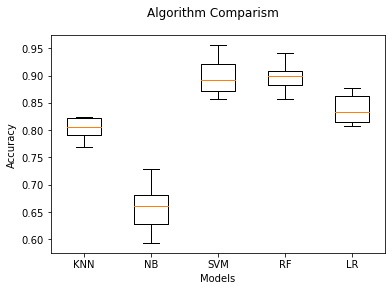

In [24]:
#Graphical Comparism
from matplotlib import pyplot
fig = pyplot.figure()
fig.suptitle('Algorithm Comparism')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Models')
pyplot.show()

#### Random Forest Trainer

In [25]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)
JOEDT = RandomForestClassifier(max_depth=8, n_estimators=120)
JOEDT.fit(X_train, y_train)
y1_predtrain = JOEDT.predict(X_train)
y1_predtest = JOEDT.predict(X_test)

print(JOEDT)
print('\nTrain metrics')
#DT Classifier metrics
DTACC = metrics.accuracy_score(y_train, y1_predtrain)
print("Accuracy:",DTACC)
# Model Precision: what percentage of positive tuples are labeled as such?
DTPre = metrics.precision_score(y_train, y1_predtrain)
print("Precision:",DTPre)
# Model Recall: what percentage of positive tuples are labelled as such?
DTRec = metrics.recall_score(y_train, y1_predtrain)
print("Recall:",DTRec)
DTf1 = metrics.f1_score(y_train, y1_predtrain)
print("F1_Score:",DTf1)

print('\nTest metrics')
#DT Classifier metrics
DTACC = metrics.accuracy_score(y_test, y1_predtest)
print("Accuracy:",DTACC)
# Model Precision: what percentage of positive tuples are labeled as such?
DTPre = metrics.precision_score(y_test, y1_predtest)
print("Precision:",DTPre)
# Model Recall: what percentage of positive tuples are labelled as such?
DTRec = metrics.recall_score(y_test, y1_predtest)
print("Recall:",DTRec)
DTf1 = metrics.f1_score(y_test, y1_predtest)
print("F1_Score:",DTf1)

RandomForestClassifier(max_depth=8, n_estimators=120)

Train metrics
Accuracy: 0.9831578947368421
Precision: 0.977110157367668
Recall: 0.9884225759768451
F1_Score: 0.9827338129496402

Test metrics
Accuracy: 0.8805237315875614
Precision: 0.896875
Recall: 0.8776758409785933
F1_Score: 0.8871715610510046


In [33]:
from sklearn.metrics import roc_curve
pred_proba=JOEDT.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label =1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_proba[:,1])

print(auc_score1)

0.9466608519619245


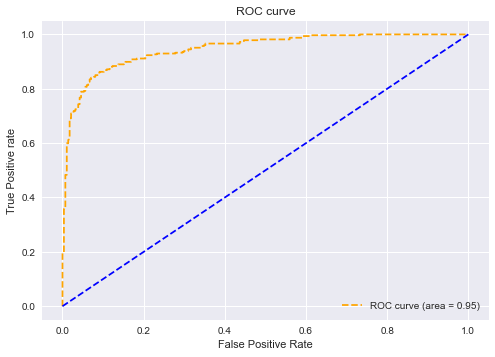

In [34]:
from sklearn.metrics import roc_curve
pred_proba=JOEDT.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label =1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_proba[:,1])


# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='ROC curve (area = %0.2f)'%auc_score1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='lower right')
plt.savefig('ROC',dpi=300)
plt.show();


#### KNN Trainer

In [26]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)
JOEKN=KNeighborsClassifier(n_neighbors=3)
JOEKN.fit(X_train, y_train)
y1_predtrain = JOEKN.predict(X_train)
y1_predtest = JOEKN.predict(X_test)
print(JOEKN)

print('\nTrain metrics')
#DT Classifier metrics
DTACC = metrics.accuracy_score(y_train, y1_predtrain)
print("Accuracy:",DTACC)
# Model Precision: what percentage of positive tuples are labeled as such?
DTPre = metrics.precision_score(y_train, y1_predtrain)
print("Precision:",DTPre)
# Model Recall: what percentage of positive tuples are labelled as such?
DTRec = metrics.recall_score(y_train, y1_predtrain)
print("Recall:",DTRec)
DTf1 = metrics.f1_score(y_train, y1_predtrain)
print("F1_Score:",DTf1)

print('\nTest metrics')
#DT Classifier metrics
DTACC = metrics.accuracy_score(y_test, y1_predtest)
print("Accuracy:",DTACC)
# Model Precision: what percentage of positive tuples are labeled as such?
DTPre = metrics.precision_score(y_test, y1_predtest)
print("Precision:",DTPre)
# Model Recall: what percentage of positive tuples are labelled as such?
DTRec = metrics.recall_score(y_test, y1_predtest)
print("Recall:",DTRec)
DTf1 = metrics.f1_score(y_test, y1_predtest)
print("F1_Score:",DTf1)

KNeighborsClassifier(n_neighbors=3)

Train metrics
Accuracy: 0.895438596491228
Precision: 0.8492268041237113
Recall: 0.9536903039073806
F1_Score: 0.8984321745057942

Test metrics
Accuracy: 0.8003273322422259
Precision: 0.792022792022792
Recall: 0.8501529051987767
F1_Score: 0.8200589970501474


#### SVM Trainer

In [28]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)
JOESVM=SVC(C=2,gamma=0.1)
JOESVM.fit(X_train, y_train)
y1_predtrain = JOESVM.predict(X_train)
y1_predtest = JOESVM.predict(X_test)
print(JOESVM)

print('\nTrain metrics')
#DT Classifier metrics
DTACC = metrics.accuracy_score(y_train, y1_predtrain)
print("Accuracy:",DTACC)
# Model Precision: what percentage of positive tuples are labeled as such?
DTPre = metrics.precision_score(y_train, y1_predtrain)
print("Precision:",DTPre)
# Model Recall: what percentage of positive tuples are labelled as such?
DTRec = metrics.recall_score(y_train, y1_predtrain)
print("Recall:",DTRec)
DTf1 = metrics.f1_score(y_train, y1_predtrain)
print("F1_Score:",DTf1)

print('\nTest metrics')
#DT Classifier metrics
DTACC = metrics.accuracy_score(y_test, y1_predtest)
print("Accuracy:",DTACC)
# Model Precision: what percentage of positive tuples are labeled as such?
DTPre = metrics.precision_score(y_test, y1_predtest)
print("Precision:",DTPre)
# Model Recall: what percentage of positive tuples are labelled as such?
DTRec = metrics.recall_score(y_test, y1_predtest)
print("Recall:",DTRec)
DTf1 = metrics.f1_score(y_test, y1_predtest)
print("F1_Score:",DTf1)

SVC(C=2, gamma=0.1)

Train metrics
Accuracy: 0.9964912280701754
Precision: 0.9971014492753624
Recall: 0.9956584659913169
F1_Score: 0.99637943519189

Test metrics
Accuracy: 0.8150572831423896
Precision: 0.9863636363636363
Recall: 0.6636085626911316
F1_Score: 0.793418647166362


#### LR Trainer

In [29]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)
JOELR=LogisticRegression()
JOELR.fit(X_train, y_train)
y1_predtrain = JOELR.predict(X_train)
y1_predtest = JOELR.predict(X_test)
print(JOELR)

print('\nTrain metrics')
#DT Classifier metrics
DTACC = metrics.accuracy_score(y_train, y1_predtrain)
print("Accuracy:",DTACC)
# Model Precision: what percentage of positive tuples are labeled as such?
DTPre = metrics.precision_score(y_train, y1_predtrain)
print("Precision:",DTPre)
# Model Recall: what percentage of positive tuples are labelled as such?
DTRec = metrics.recall_score(y_train, y1_predtrain)
print("Recall:",DTRec)
DTf1 = metrics.f1_score(y_train, y1_predtrain)
print("F1_Score:",DTf1)

print('\nTest metrics')
#DT Classifier metrics
DTACC = metrics.accuracy_score(y_test, y1_predtest)
print("Accuracy:",DTACC)
# Model Precision: what percentage of positive tuples are labeled as such?
DTPre = metrics.precision_score(y_test, y1_predtest)
print("Precision:",DTPre)
# Model Recall: what percentage of positive tuples are labelled as such?
DTRec = metrics.recall_score(y_test, y1_predtest)
print("Recall:",DTRec)
DTf1 = metrics.f1_score(y_test, y1_predtest)
print("F1_Score:",DTf1)

LogisticRegression()

Train metrics
Accuracy: 0.9164912280701755
Precision: 0.9109195402298851
Recall: 0.9175108538350217
F1_Score: 0.9142033165104542

Test metrics
Accuracy: 0.8216039279869067
Precision: 0.8187134502923976
Recall: 0.8562691131498471
F1_Score: 0.8370702541106128


C:\Users\joe1a\anaconda3\envs\Joe\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### NB Trainer

In [30]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)
JOENB=GaussianNB()
JOENB.fit(X_train, y_train)
y1_predtrain = JOENB.predict(X_train)
y1_predtest = JOENB.predict(X_test)
print(JOENB)

print('\nTrain metrics')
#DT Classifier metrics
DTACC = metrics.accuracy_score(y_train, y1_predtrain)
print("Accuracy:",DTACC)
# Model Precision: what percentage of positive tuples are labeled as such?
DTPre = metrics.precision_score(y_train, y1_predtrain)
print("Precision:",DTPre)
# Model Recall: what percentage of positive tuples are labelled as such?
DTRec = metrics.recall_score(y_train, y1_predtrain)
print("Recall:",DTRec)
DTf1 = metrics.f1_score(y_train, y1_predtrain)
print("F1_Score:",DTf1)

print('\nTest metrics')
#DT Classifier metrics
DTACC = metrics.accuracy_score(y_test, y1_predtest)
print("Accuracy:",DTACC)
# Model Precision: what percentage of positive tuples are labeled as such?
DTPre = metrics.precision_score(y_test, y1_predtest)
print("Precision:",DTPre)
# Model Recall: what percentage of positive tuples are labelled as such?
DTRec = metrics.recall_score(y_test, y1_predtest)
print("Recall:",DTRec)
DTf1 = metrics.f1_score(y_test, y1_predtest)
print("F1_Score:",DTf1)

GaussianNB()

Train metrics
Accuracy: 0.7087719298245614
Precision: 0.6578947368421053
Recall: 0.8321273516642547
F1_Score: 0.7348242811501599

Test metrics
Accuracy: 0.6972176759410802
Precision: 0.6898395721925134
Recall: 0.7889908256880734
F1_Score: 0.7360912981455064


### Testing on external data

#### Preparing ext_test data

In [31]:
l=[]
for i in Datum.Label:
    if i =='Active':
        l.append(1)
    else:
        l.append(0)
Datum=Datum.drop('Label',axis=1)
Datum['Label']=l
Datum = Datum.fillna(0)
#Manual Standardization
dt= pd.DataFrame()
for i in col:
    array = np.array(Datum[i])
    mean = dp[i][0]
    std = dp[i][1]
    aa=[]
    #print(aa)
    for j in array:
        
        n = ((j-mean)/std)
        aa.append(n)
        #print(aa)
        
    dt[i]=aa
dt['Label'] =l 
dt

,nAcid,ALogP,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,Label
0,-0.300625,-0.137542,0.089259,0.028420,0.014137,0.144173,0.011229,-0.078300,0.086583,0.237697,...,-0.291446,0.060156,-0.568227,-0.663154,0.255624,-0.028038,0.671949,0.035869,0.346285,1
1,1.706171,-2.533393,0.698721,-0.254942,-1.594864,-1.559464,0.120094,0.145133,0.086583,-0.735489,...,-0.031843,0.027369,1.649615,3.469275,-1.137795,-0.028038,0.296174,-3.008820,-0.009954,0
2,1.706171,-0.349262,-0.572652,-0.536848,0.371693,0.314537,-0.641961,-0.190017,-0.963288,-0.735489,...,0.565103,-0.230770,0.920278,0.803233,-0.075504,-0.028038,-0.294329,-0.943348,-0.168282,0
3,-0.300625,1.756507,-0.356302,-0.518611,-0.522197,-0.537282,-0.369798,-0.860317,0.086583,-0.457436,...,-0.554451,-0.923984,-1.335279,-0.677051,-1.137795,-0.028038,-0.884831,1.009319,-0.801595,1
4,-0.300625,0.976243,-1.335948,-1.209714,0.192915,0.314537,-1.295150,-1.195467,-1.249616,-1.013542,...,0.220070,-1.162059,-1.011194,-1.044961,-0.545910,-0.028039,-1.045878,-0.032968,-1.078669,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,-0.300625,0.774439,-0.914775,-0.252224,1.444360,1.336719,-0.260933,0.256850,-0.676959,-0.179383,...,0.243672,0.247760,1.093074,-0.666748,1.844705,-0.028038,0.296174,-0.471579,0.306702,0
492,-0.300625,-0.757372,-0.029829,0.341798,0.550471,0.484901,0.392256,0.480283,0.277468,0.376724,...,-0.146995,0.448838,0.492991,0.998121,0.007665,-0.028036,-0.186964,-0.254256,0.187956,0
493,-0.300625,1.678511,0.885283,-0.507427,-1.594864,-1.559464,-0.914123,-0.413450,-1.249616,-0.735489,...,1.434754,-0.355138,0.319231,-0.600146,-1.137795,-0.028038,0.564585,-0.178932,0.346285,0
494,-0.300625,-0.046039,-0.419932,-1.128420,-1.594864,-1.559464,-0.859690,-1.530617,-0.199745,-1.291596,...,-0.781051,-1.588808,-1.349890,-1.044961,-0.677198,-0.028039,-1.582698,-0.220378,-1.632817,0


#### Algorithms on test data

In [35]:
Xt = dt.iloc[:,:-1]
yt = dt.iloc[:,-1]

y1_predtest = JOEDT.predict(Xt)
print(JOEDT)
#DT Classifier metrics
DTACC = metrics.accuracy_score(yt, y1_predtest)
print("Accuracy:",DTACC)
y1_predtest = JOESVM.predict(Xt)
print(JOESVM)
#DT Classifier metrics
DTACC = metrics.accuracy_score(yt, y1_predtest)
print("Accuracy:",DTACC)
y1_predtest = JOELR.predict(Xt)
print(JOELR)
#DT Classifier metrics
DTACC = metrics.accuracy_score(yt, y1_predtest)
print("Accuracy:",DTACC)
y1_predtest = JOEKN.predict(Xt)
print(JOEKN)
#DT Classifier metrics
DTACC = metrics.accuracy_score(yt, y1_predtest)
print("Accuracy:",DTACC)
y1_predtest = JOENB.predict(Xt)
print(JOENB)
#DT Classifier metrics
DTACC = metrics.accuracy_score(yt, y1_predtest)
print("Accuracy:",DTACC)

RandomForestClassifier(max_depth=8, n_estimators=120)
Accuracy: 0.8165322580645161
SVC(C=2, gamma=0.1)
Accuracy: 0.7258064516129032
LogisticRegression()
Accuracy: 0.7983870967741935
KNeighborsClassifier(n_neighbors=3)
Accuracy: 0.7600806451612904
GaussianNB()
Accuracy: 0.6431451612903226


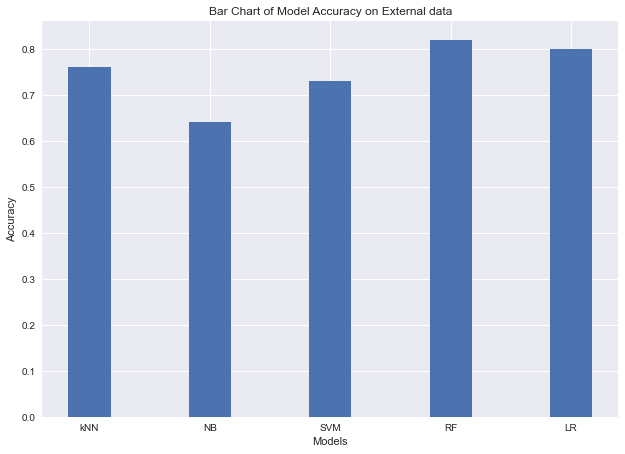

In [36]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['kNN','NB','SVM','RF', 'LR']
students = [0.76,0.64,0.73,0.82,0.80]
ax.bar(langs,students, width = 0.35)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Bar Chart of Model Accuracy on External data')
plt.show()

In [38]:
w=sa(title='Save Model as')
pickle.dump(JOEDT,open(w, 'wb'))